In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('titanic.xls')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


## Total Age Distribution

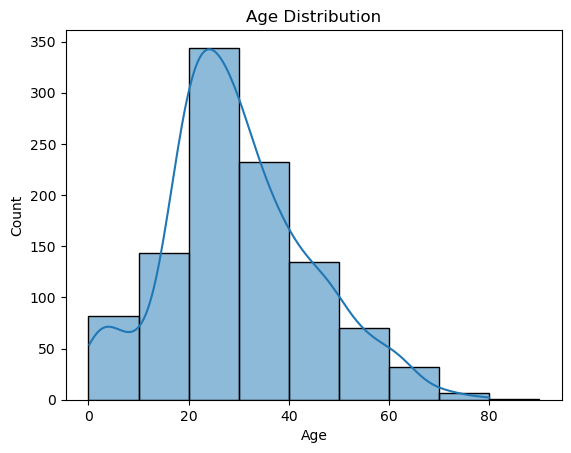

In [4]:
sns.histplot(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [5]:
df.pclass.nunique()

3

In [6]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
age_groups = pd.cut(df['age'], bins=bins, labels=labels)
precentes = age_groups.value_counts() / age_groups.count() * 100

## Age Distribution by Pclass

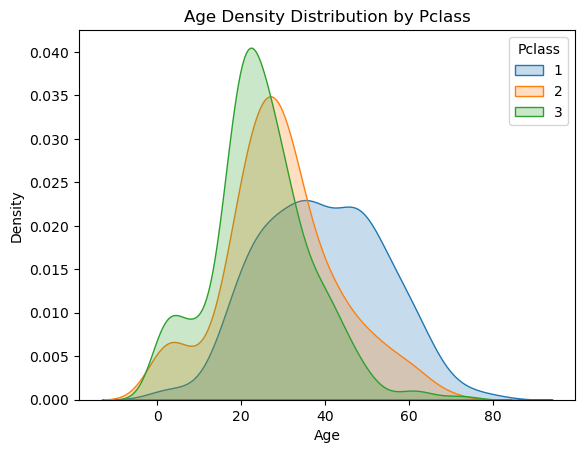

In [7]:
grouped_by_pclass = df.groupby('pclass')
for group_id, group in grouped_by_pclass:
    sns.kdeplot(group['age'], label=f'{group_id}', fill=True)
plt.title('Age Density Distribution by Pclass')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Pclass')
plt.show()

In [8]:
df["last_name"] = df["name"].apply(lambda x: x.split(",")[0])

In [9]:
df["age_groups"] = age_groups
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,last_name,age_groups
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen,20-29
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison,0-9
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,0-9
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison,20-29
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison,20-29


## Survival Distribution

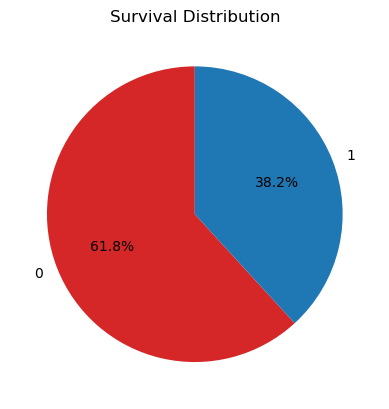

In [10]:
survival_distribution = df['survived'].value_counts()
survival_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['tab:red', 'tab:blue'])
plt.title('Survival Distribution')
plt.ylabel('')
plt.show()

## Survival vs Age

/var/folders/pm/wnlkh7xd0gx096nr9129p76c0000gn/T/ipykernel_14205/295400895.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_age_groups = df.groupby('age_groups')


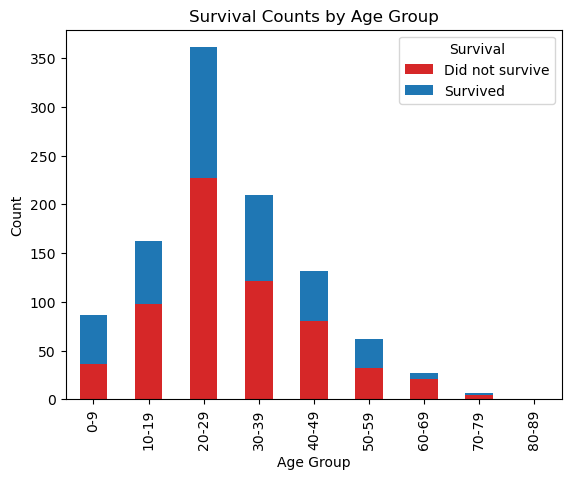

In [11]:
grouped_by_age_groups = df.groupby('age_groups')
survived_counts = grouped_by_age_groups['survived'].value_counts().unstack()
survived_counts.plot(kind='bar', stacked=True, color=['tab:red', 'tab:blue'])
plt.title('Survival Counts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'], title='Survival')
plt.show()

## Survival vs Pclass

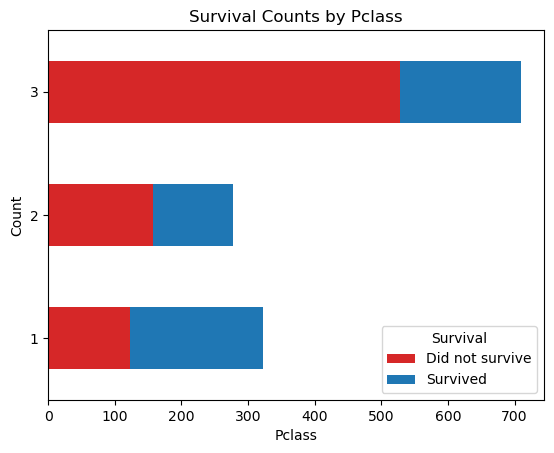

In [12]:
survived_counts = grouped_by_pclass['survived'].value_counts().unstack()
survived_counts.plot(kind='barh', stacked=True, color=['tab:red', 'tab:blue'])
plt.title('Survival Counts by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count') 
plt.legend(['Did not survive', 'Survived'], title='Survival')
plt.show()


## Pclass ticket prices

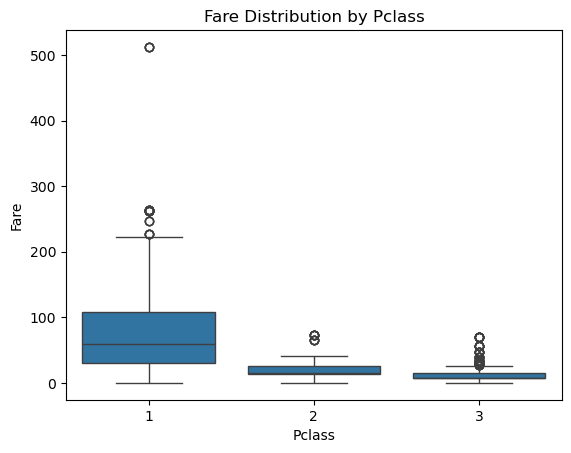

In [13]:
sns.boxplot(x='pclass', y='fare', data=df)
plt.title('Fare Distribution by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

## Sex Distribution

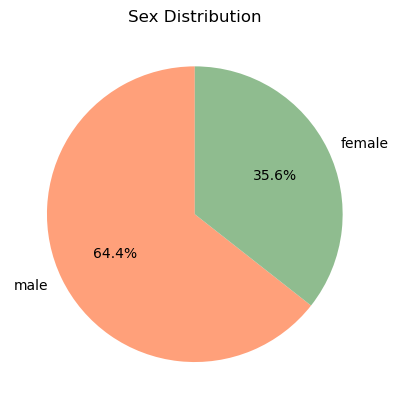

In [14]:
sex_distribution = df['sex'].value_counts()
sex_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightsalmon', 'darkseagreen'])
plt.title('Sex Distribution')
plt.ylabel('')
plt.show()

## Survival Vs Sex

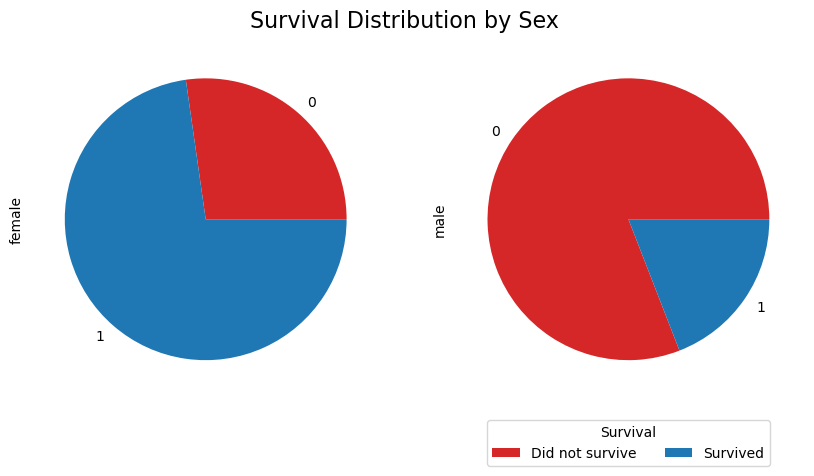

In [15]:
grouped_by_survived = df.groupby('survived')
sex_count = grouped_by_survived.sex.value_counts().unstack()
sex_count.plot(kind='pie', subplots=True, figsize=(10, 20), colors=[
               'tab:red', 'tab:blue'], legend=False)
plt.legend(['Did not survive', 'Survived'], title='Survival', loc='upper center', 
           bbox_to_anchor=(0.5, -0.05), ncol=2)
plt.gca().set_aspect('equal')
plt.suptitle('Survival Distribution by Sex', y=0.6, fontsize=16)
plt.show()

## Survival vs Source Station

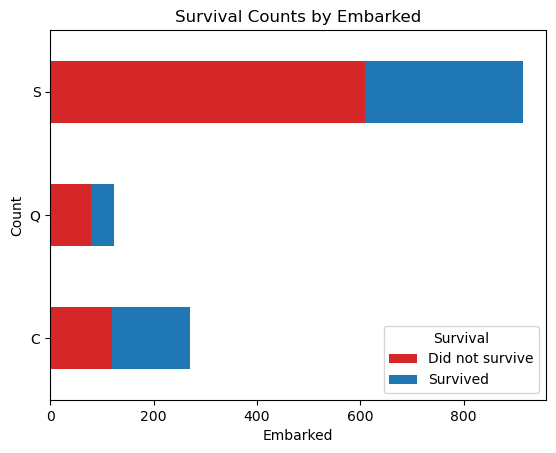

In [16]:
group_by_embarked = df.groupby('embarked')
survived_counts = group_by_embarked['survived'].value_counts().unstack()
survived_counts.plot(kind='barh', stacked=True, color=['tab:red', 'tab:blue'])
plt.title('Survival Counts by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'], title='Survival')
plt.show()

## Embarked Distribution

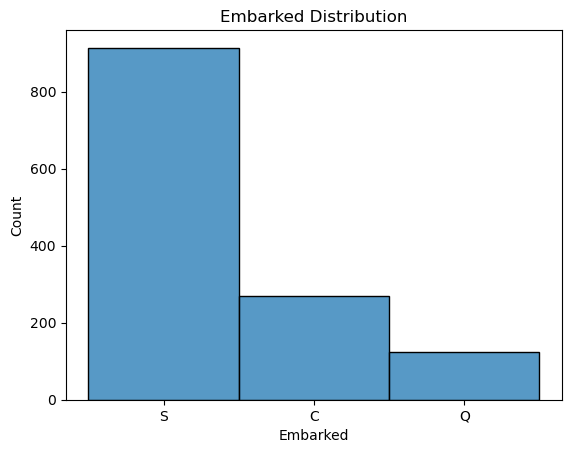

In [17]:
sns.histplot(df.embarked)
plt.title('Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

## Pclass vs Sex

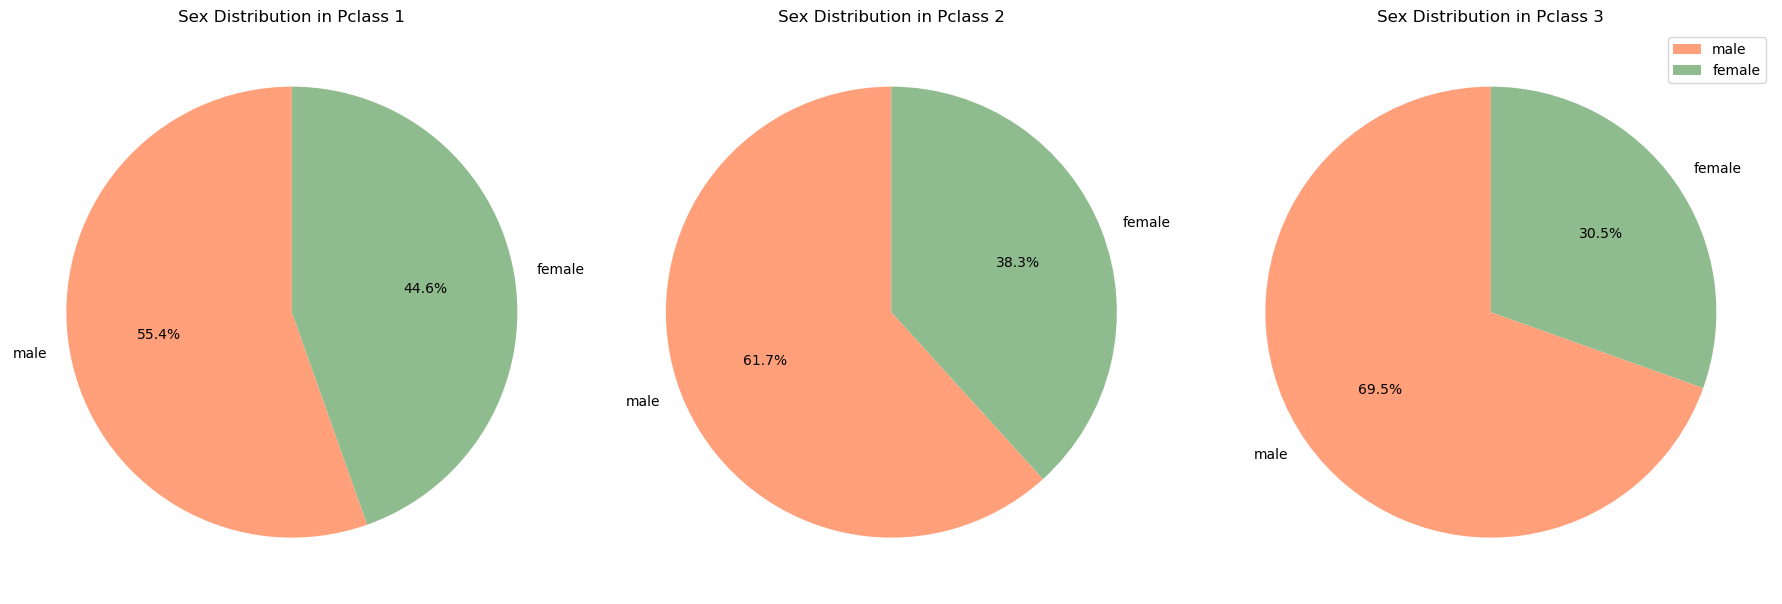

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for ax, (pclass, group) in zip(axes, grouped_by_pclass):
    sex_count = group['sex'].value_counts()
    sex_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightsalmon', 'darkseagreen'], ax=ax)
    ax.set_title(f'Sex Distribution in Pclass {pclass}')
    ax.set_ylabel('')

plt.legend()
plt.tight_layout()
plt.show()

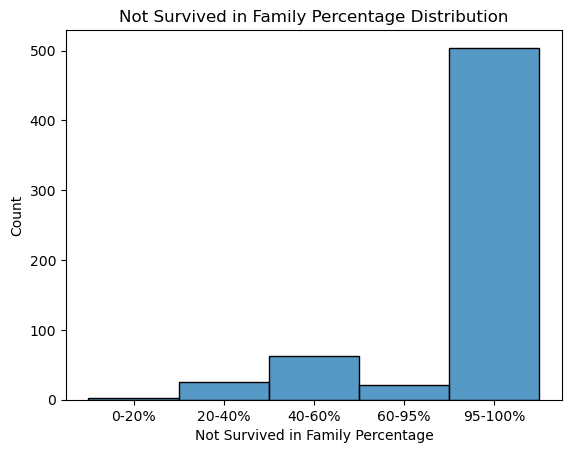

In [19]:
df['not_survived'] = ~df['survived'].astype(bool)

grouped_by_last_name = df.groupby('last_name')
not_survived_in_family_percentage =  (grouped_by_last_name['not_survived']).sum() / grouped_by_last_name['not_survived'].count() * 100
bins = [0, 20, 40, 60, 95, 100]
labels = ['0-20%', '20-40%', '40-60%', '60-95%', '95-100%']
not_survived_in_family_binned = pd.cut(not_survived_in_family_percentage, bins=bins, labels=labels)
sns.histplot(not_survived_in_family_binned, kde=False)
plt.title('Not Survived in Family Percentage Distribution')
plt.xlabel('Not Survived in Family Percentage')
plt.ylabel('Count')
plt.show()

## C Embarked vs Survival (they survived the most)

### C Embarked: Sex vs Survival

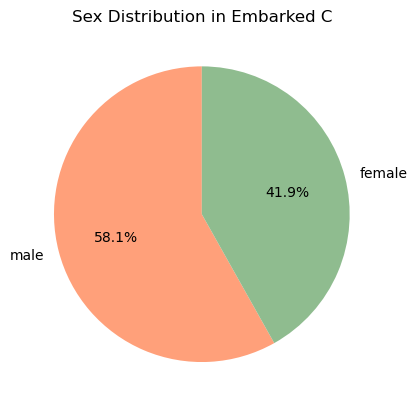

In [20]:
c_embarked = group_by_embarked.get_group('C')
c_embarked.value_counts('sex').plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightsalmon', 'darkseagreen'])
plt.title('Sex Distribution in Embarked C')
plt.ylabel('')
plt.show()

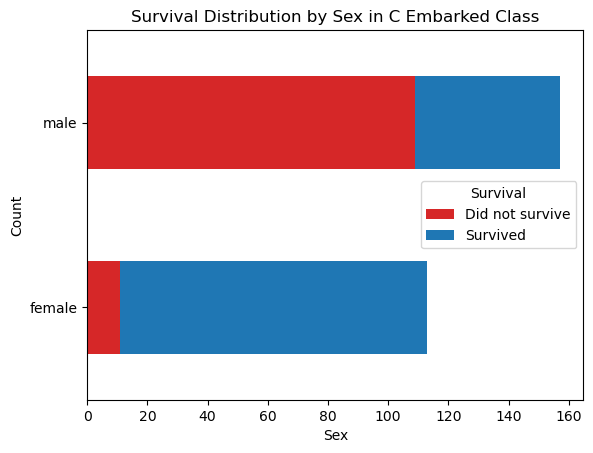

In [21]:
survived_counts = c_embarked.groupby('sex')['survived'].value_counts().unstack().fillna(0)
survived_counts.plot(kind='barh', stacked=True, color=['tab:red', 'tab:blue'])
plt.title('Survival Distribution by Sex in C Embarked Class')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(['Did not survive', 'Survived'], title='Survival')
plt.show()

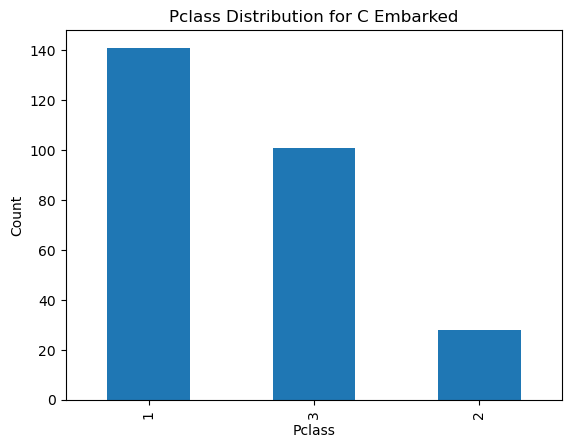

In [22]:
pclass_distribution_c_embarked = c_embarked['pclass'].value_counts()
pclass_distribution_c_embarked.plot(kind='bar')
plt.title('Pclass Distribution for C Embarked')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

In [23]:
c_embarked.info()

<class 'pandas.core.frame.DataFrame'>
Index: 270 entries, 9 to 1307
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   pclass        270 non-null    int64   
 1   survived      270 non-null    int64   
 2   name          270 non-null    object  
 3   sex           270 non-null    object  
 4   age           212 non-null    float64 
 5   sibsp         270 non-null    int64   
 6   parch         270 non-null    int64   
 7   ticket        270 non-null    object  
 8   fare          270 non-null    float64 
 9   cabin         118 non-null    object  
 10  embarked      270 non-null    object  
 11  boat          149 non-null    object  
 12  body          25 non-null     float64 
 13  home.dest     172 non-null    object  
 14  last_name     270 non-null    object  
 15  age_groups    212 non-null    category
 16  not_survived  270 non-null    bool    
dtypes: bool(1), category(1), float64(3), int64(4), object(8)
m

## SibSp distribution

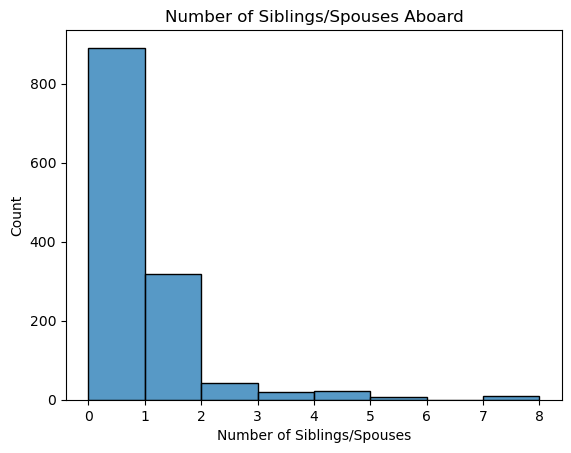

In [24]:
sns.histplot(df['sibsp'], bins=8, kde=False)
plt.title('Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.show()

## Parch distribution

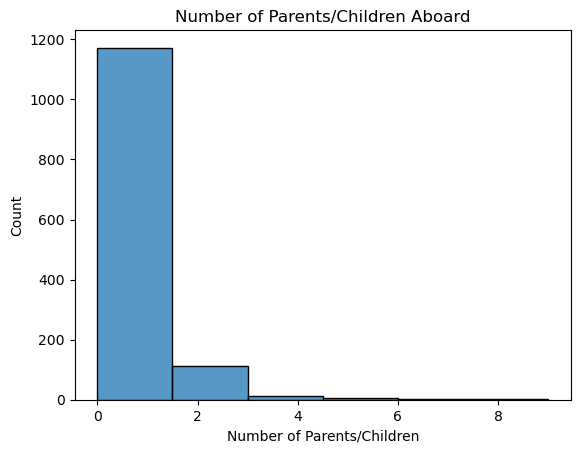

In [25]:
sns.histplot(df['parch'], bins=6, kde=False)
plt.title('Number of Parents/Children Aboard')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Count') 
plt.show()

In [26]:
df['family'] = df['sibsp'] + df['parch']
df['family_bins'] = pd.cut(df['family'], bins=[0, 1, 4, 7, 11], labels=['0', '1-3', '4-6', '7-10'])

## Family distribution

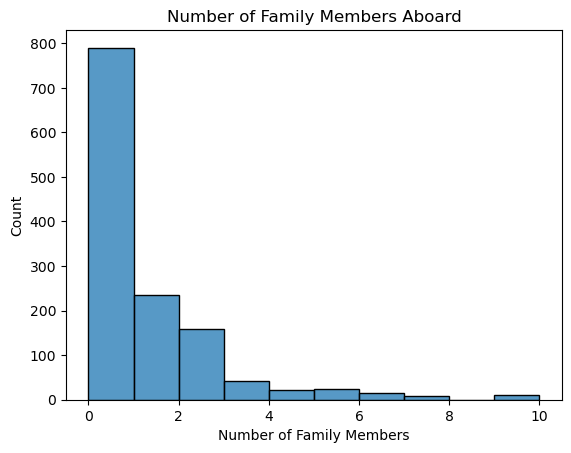

In [27]:
sns.histplot(df['family'], bins=10, kde=False)
plt.title('Number of Family Members Aboard')
plt.xlabel('Number of Family Members')
plt.ylabel('Count')
plt.show()

### Family vs Pclass

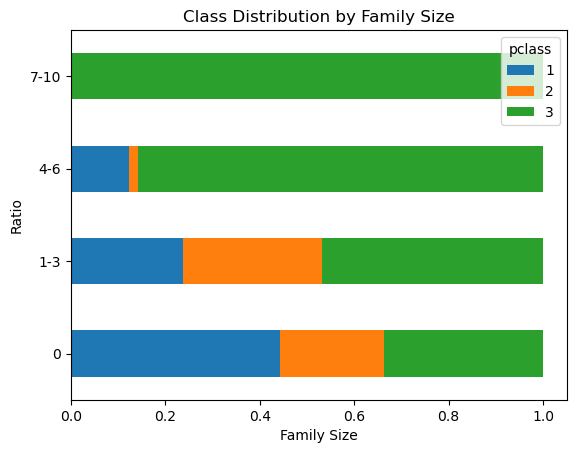

In [28]:
grouped_by_family = df.groupby('family_bins', observed=True)
pclass_count = grouped_by_family['pclass'].value_counts(normalize=True).unstack()
pclass_count.plot(kind='barh', stacked='True')
plt.title('Class Distribution by Family Size')
plt.legend(title='pclass')
plt.xlabel('Family Size')
plt.ylabel('Ratio')
plt.show()

### Family vs Survived

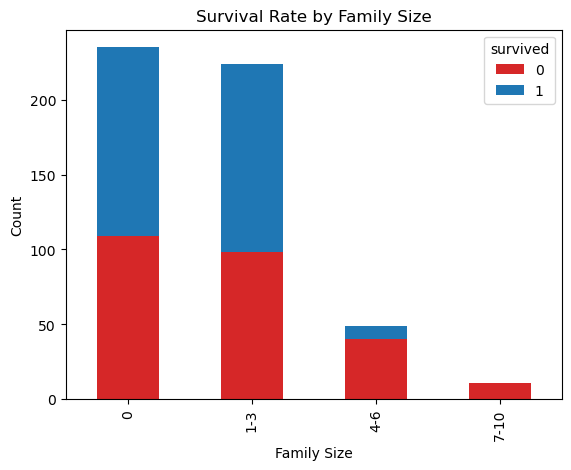

In [29]:
survived_count = grouped_by_family['survived'].value_counts().unstack()
survived_count.plot(kind='bar', stacked='True', color=['tab:red', 'tab:blue'])
plt.title('Survival Rate by Family Size')
plt.legend(title='survived')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

In [30]:
df['ticket'].describe() 

count         1309
unique         939
top       CA. 2343
freq            11
Name: ticket, dtype: object

In [31]:
df['cabin'].describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: cabin, dtype: object

In [32]:
df['cabin_row'] = df['cabin'].str[0]
cabin_df = df.dropna(subset=['cabin_row'])
cabin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 0 to 1249
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   pclass        295 non-null    int64   
 1   survived      295 non-null    int64   
 2   name          295 non-null    object  
 3   sex           295 non-null    object  
 4   age           272 non-null    float64 
 5   sibsp         295 non-null    int64   
 6   parch         295 non-null    int64   
 7   ticket        295 non-null    object  
 8   fare          295 non-null    float64 
 9   cabin         295 non-null    object  
 10  embarked      293 non-null    object  
 11  boat          193 non-null    object  
 12  body          32 non-null     float64 
 13  home.dest     258 non-null    object  
 14  last_name     295 non-null    object  
 15  age_groups    272 non-null    category
 16  not_survived  295 non-null    bool    
 17  family        295 non-null    int64   
 18  family_bins   

## Cabin Row vs Pclass

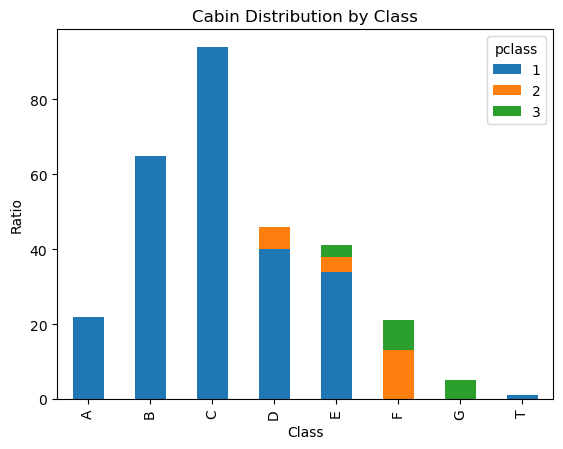

In [33]:
grouped_by_cabin_row = cabin_df.groupby('cabin_row', observed=True)
pclass_count = grouped_by_cabin_row['pclass'].value_counts().unstack()
pclass_count.plot(kind='bar', stacked='True')
plt.title('Cabin Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Ratio')
plt.show()

## Survivel vs Cabin

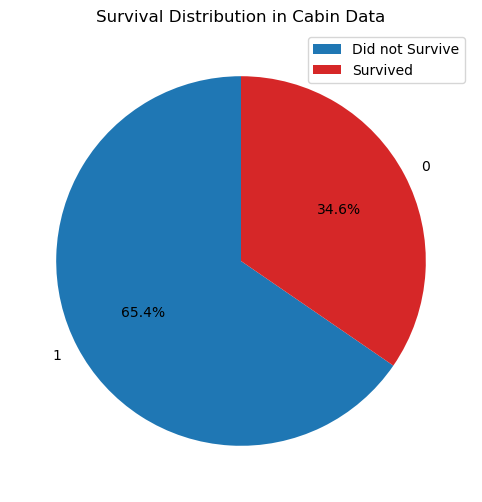

In [34]:
survival_counts = cabin_df['survived'].value_counts()
plt.figure(figsize=(8, 6))
survival_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['tab:blue', 'tab:red'])
plt.title('Survival Distribution in Cabin Data')
plt.ylabel('')
plt.legend(['Did not Survive', 'Survived'])
plt.show()

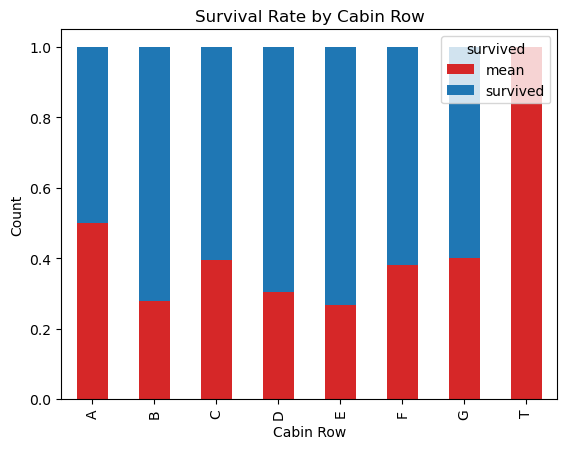

In [35]:
survived_count = grouped_by_cabin_row['survived'].value_counts(
    normalize=True).unstack()
survived_count.plot(kind='bar', stacked='True', color=['tab:red', 'tab:blue'])
plt.title('Survival Rate by Cabin Row')
plt.legend(['mean', 'survived', 'Did not Survive'], title='survived')
plt.xlabel('Cabin Row')
plt.ylabel('Count')
plt.show()